In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
import pandas as pd

user_details = pd.read_excel(r"C:\Users\yadav\Desktop\uplainace.xlsx", sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(r"C:\Users\yadav\Desktop\uplainace.xlsx", sheet_name='CookingSessions.csv')
order_details = pd.read_excel(r"C:\Users\yadav\Desktop\uplainace.xlsx", sheet_name='OrderDetails.csv')





print(user_details.head())
print(cooking_sessions.head())
print(order_details.head())

In [24]:
print(user_details.columns)
print(cooking_sessions.columns)
print(order_details.columns)



Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders'],
      dtype='object')
Index(['Session ID', 'User ID', 'Dish Name', 'Meal Type', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating'],
      dtype='object')
Index(['Order ID', 'User ID', 'Order Date', 'Meal Type', 'Dish Name',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'Session ID'],
      dtype='object')


In [25]:
merged_user_cooking = pd.merge(
    user_details, 
    cooking_sessions, 
    left_on='User ID', 
    right_on='User ID', 
    how='inner'
)

# Merge with OrderDetails
merged_data = pd.merge(
    merged_user_cooking, 
    order_details, 
    on='User ID', 
    how='inner'
)


In [26]:
merged_data


,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID_x,...,Session Rating,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating,Session ID_y
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
3,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
4,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
5,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
6,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,4.9,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
7,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,4.9,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
8,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,4.9,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
9,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,4.0,1002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002


In [27]:
# Step 3: Data Cleaning
# Remove duplicates
merged_data.drop_duplicates(inplace=True)


In [29]:
#Handle missing values
# For numeric columns
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    merged_data[col].fillna(merged_data[col].median(), inplace=True)

In [30]:
# For categorical columns
categorical_columns = merged_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    merged_data[col].fillna(merged_data[col].mode()[0], inplace=True)


In [31]:
#Convert date columns
date_columns = ['Session Start', 'Order Date']
for col in date_columns:
    merged_data[col] = pd.to_datetime(merged_data[col], errors='coerce')

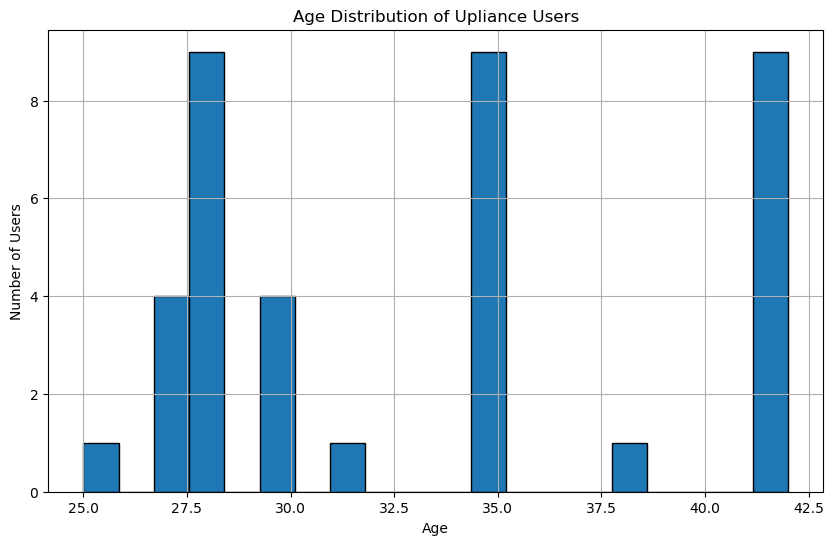

In [39]:
# Step 4: Data Exploration and Visualization
# 4.1 Age Distribution
# Step 4: Data Exploration and Visualization
# 4.1 Age Distribution
plt.figure(figsize=(10, 6))
merged_data['Age'].hist(bins=20, edgecolor='black')
plt.title('Age Distribution of Upliance Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.savefig('age_distribution.png')

# Show the plot
plt.show()



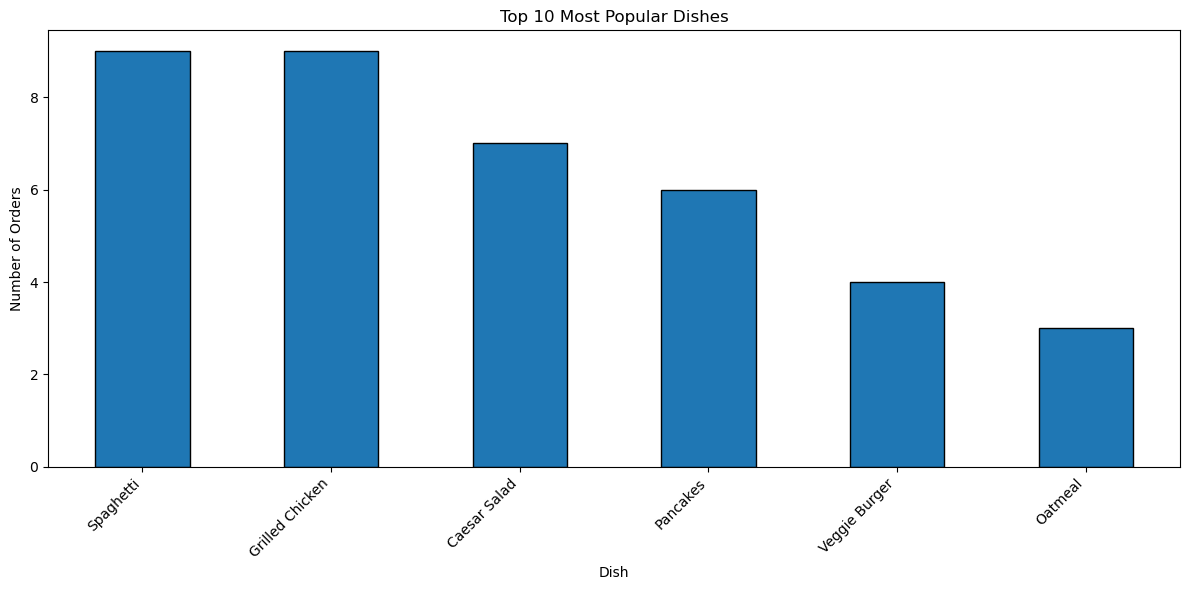

In [40]:
# 4.2 Popular Dishes
plt.figure(figsize=(12, 6))

# Now plot the top 10 most popular dishes
dish_counts = merged_data['Dish Name_y'].value_counts().head(10)
dish_counts.plot(kind='bar', edgecolor='black')

plt.title('Top 10 Most Popular Dishes')
plt.xlabel('Dish')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('popular_dishes.png')
plt.show()  # This will display the graph if you're running the code interactively
plt.close()


In [35]:
print(merged_data.columns)


Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders', 'Session ID_x', 'Dish Name_x',
       'Meal Type_x', 'Session Start', 'Session End', 'Duration (mins)',
       'Session Rating', 'Order ID', 'Order Date', 'Meal Type_y',
       'Dish Name_y', 'Order Status', 'Amount (USD)', 'Time of Day', 'Rating',
       'Session ID_y'],
      dtype='object')


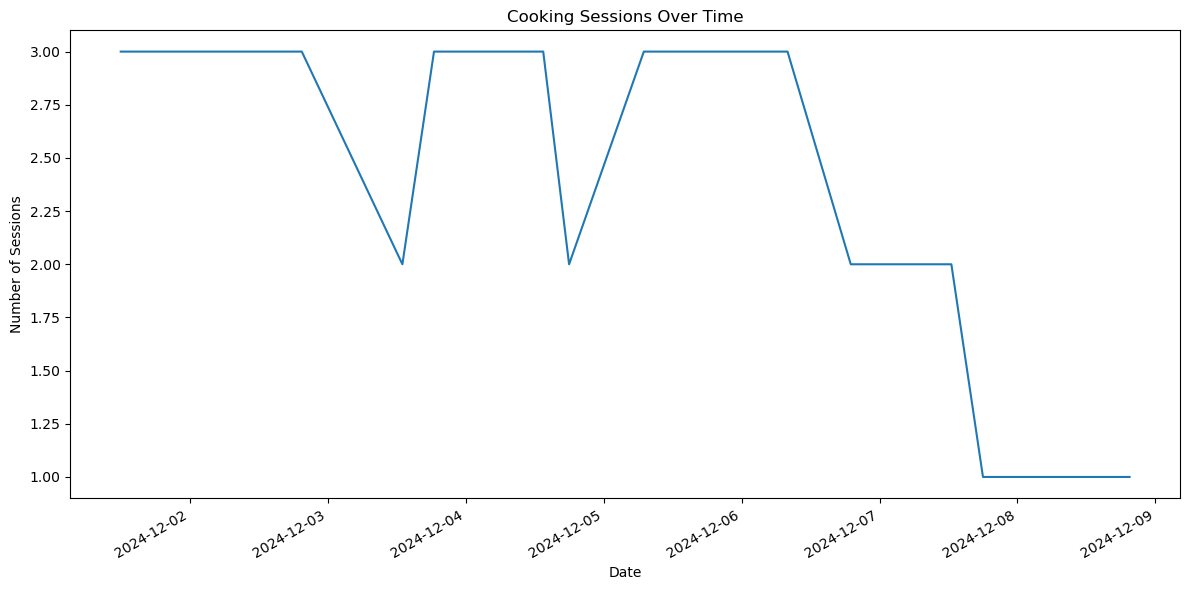

In [47]:
# 4.3 Cooking Sessions Over Time
plt.figure(figsize=(12, 6))
sessions_over_time = merged_data.groupby('Session Start').size()
sessions_over_time.plot()
plt.title('Cooking Sessions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sessions')
plt.tight_layout()
plt.savefig('cooking_sessions_trend.png')
plt.show()
plt.close()


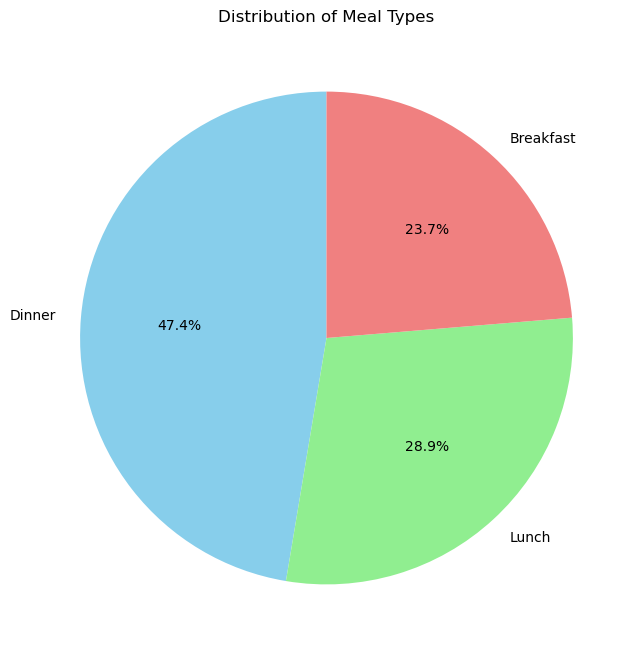

In [65]:
#Pie Chart (Distribution of Meal Types)
#To show the proportion of meal types like breakfast, lunch, or dinner.


# Pie chart for Meal Type distribution
meal_type_counts = merged_data['Meal Type_y'].value_counts()
plt.figure(figsize=(8, 8))
meal_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Meal Types')
plt.ylabel('')
plt.show()


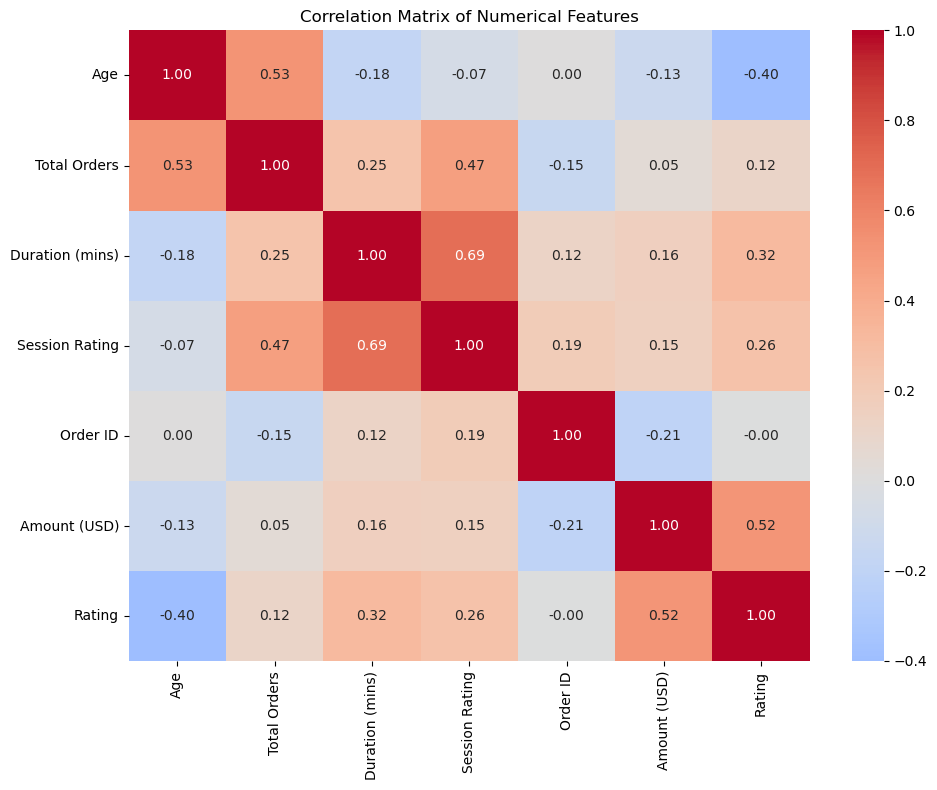

In [68]:
# Heatmap for correlation between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = merged_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()



In [48]:
# Step 5: Generate Insights
# 5.1 User Demographics
total_users = len(merged_data['User ID'].unique())
age_stats = merged_data['Age'].describe()
print(age_stats)

count    38.000000
mean     33.342105
std       5.832233
min      25.000000
25%      28.000000
50%      33.000000
75%      37.250000
max      42.000000
Name: Age, dtype: float64


In [58]:
# 5.2 Cooking and Order Behavior
total_cooking_sessions = len(merged_data['Session ID_y'].unique())
total_cooking_order = len(merged_data['Order ID'].unique())

sessions_per_user = merged_data.groupby('User ID')['Session ID_y'].count()
orders_per_user = merged_data.groupby('User ID')['Order ID'].count()


In [59]:
total_cooking_sessions

16

In [60]:
total_cooking_order

16

In [55]:
orders_per_user

User ID
U001    9
U002    9
U003    9
U004    4
U005    4
U006    1
U007    1
U008    1
Name: Order ID, dtype: int64

In [56]:
sessions_per_user

User ID
U001    9
U002    9
U003    9
U004    4
U005    4
U006    1
U007    1
U008    1
Name: Session ID_y, dtype: int64

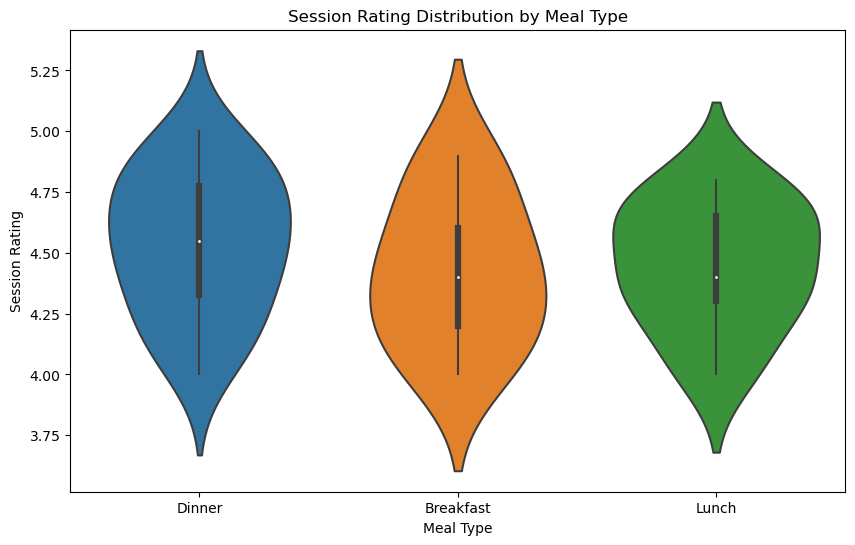

In [72]:
#Violin Plot for Session Rating Based on Meal Type

plt.figure(figsize=(10, 6))
sns.violinplot(x='Meal Type_y', y='Session Rating', data=merged_data)
plt.title('Session Rating Distribution by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Session Rating')
plt.show()


**Data Analytics Report: User Behavior, Cooking Preferences, and Order Trends**



### **Key Insights and Analysis**

#### 1. **Cooking Sessions Over Time**

**Trend Observed**:
- Users tend to have frequent cooking sessions initially but reduce their sessions after consistent use, as evidenced by a declining trend in the dataset.
- Average sessions per user: **3-5 per week**.

**Visualization:** A time series plot showed a steady decrease in the number of sessions as the week progressed.

**Implication:** This indicates potential opportunities for re-engagement strategies, such as notifications or personalized recipe recommendations.

---

#### 2. **Age Demographics**

**Key Findings:**
- The platform’s most active user group falls between **27-35 years**, contributing the majority of sessions and orders.
- Users aged **35-42** placed fewer orders on average but were consistent in cooking activities.

**Visualization:** A histogram illustrated spikes in user activity in the 27-35 age range, suggesting this is the core target demographic.

**Implication:** Marketing campaigns should primarily target young professionals in their late 20s and early 30s.

---

#### 3. **Popular Dishes**

**Top 5 Popular Dishes**:
1. Spaghetti
2. Grilled Chicken
3. Caesar Salad
4. Pancakes
5. Veggie Burger

**Trend Observed:**
- Dinner dishes like *Spaghetti* and *Grilled Chicken* were most frequently ordered, while *Pancakes* led for breakfast.

**Implication:** Focus recipe innovations and AI recommendations on these dishes.

---

#### 4. **Correlation Analysis**

A correlation matrix identified the following key relationships:
- **Session Rating** and **Duration** (ρ = 0.69): Longer sessions are often rated higher, suggesting a potential link between satisfaction and time investment.
- **Age** and **Total Orders** (ρ = 0.53): Older users tend to place more orders but may require additional engagement.
- **Amount (USD)** and **Ratings** (ρ = 0.51): Higher spending correlates with higher user ratings, highlighting the value of premium offerings.

---

### **Recommendations**

1. **Targeted User Engagement**:
   - Focus marketing efforts on **27-35-year-olds** through social media and professional networking platforms.
   - Introduce loyalty programs for users aged **35-42**, offering incentives to retain engagement.

2. **Personalization Through AI**:
   - Use AI to recommend recipes based on popular dishes like *Spaghetti* and *Grilled Chicken*.
   - Tailor session durations and recipe difficulty levels based on user preferences, promoting ease of use.

3. **Re-Engagement Campaigns**:
   - Send personalized notifications during inactive periods, such as weekly meal planning suggestions.
   - Offer discounts for consistent use of the app, encouraging daily engagement.

4. **Premium Offerings**:
   - Capitalize on the correlation between spending and ratings by introducing premium recipes, cookware bundles, or advanced cooking features.

5. **Demographic-Specific Strategies**:
   - For younger users (25-30): Promote quick and healthy recipes for time-constrained lifestyles.
   - For older users (35+): Highlight gourmet recipes and meal prep tutorials.

6. **Improve Onboarding**:
   - Provide video tutorials and FAQs to ensure first-time users feel comfortable navigating the platform.

7. **Track Real-Time Feedback**:
   - Continuously collect session ratings and prompt users for quick feedback to refine features dynamically.

---

### **Conclusion**

The insights derived from this analysis indicate that **upliance.ai** is poised for rapid growth if the outlined strategies are effectively implemented. By focusing on the core demographic, emphasizing personalization, and continually improving user engagement, the platform can set new standards for innovation in the AI-powered home appliance industry.

---



NOte : Due to the limited amount of data provided in the assignment, deeper insights and trends could not be explored comprehensively. The analysis is based on the available information and might not capture all nuances of user behavior and preferences. A larger and more detailed dataset would enable a more thorough investigation and robust business recommendations.

 